<a href="https://colab.research.google.com/github/bharathi6127/-Expense-Sharing-App/blob/main/Energy_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading the dataset**

In [3]:
df = pd.read_csv('/content/Steel_industry_dataset.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900.0,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500.0,Weekday,Monday,Light_Load


### **Dataset Columns:**

**date:** Timestamp of the data record (e.g., "01/01/2018 00:15").

**Usage_kWh:** Energy consumption in kilowatt-hours.

**Lagging_Current_Reactive.Power_kVarh:** Reactive power with a lagging current in kilovolt-ampere reactive hours.

**Leading_Current_Reactive.Power_kVarh:** Reactive power with a leading current in kilovolt-ampere reactive hours.

**CO2:** Carbon dioxide emissions in metric tons.

**Lagging_Current_Power_Factor**: Power factor for lagging current.

**Leading_Current_Power_Factor:** Power factor for leading current.

**NSM:** Numeric time indicator (possibly in seconds).

**WeekStatus:** Whether the day is a "Weekday" or "Weekend".

**Day_of_week:** Day of the week (e.g., "Monday").

**Load_Type:** Type of load (e.g., "Light_Load").

In [4]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13419 entries, 0 to 13418
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  13419 non-null  object 
 1   Usage_kWh                             13419 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  13418 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  13418 non-null  float64
 4   CO2                                   13418 non-null  float64
 5   Lagging_Current_Power_Factor          13418 non-null  float64
 6   Leading_Current_Power_Factor          13418 non-null  float64
 7   NSM                                   13418 non-null  float64
 8   WeekStatus                            13418 non-null  object 
 9   Day_of_week                           13418 non-null  object 
 10  Load_Type                             13418 non-null  object 
dtypes: float64(7), 

In [5]:
df.shape

(13419, 11)

In [6]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [7]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,13419.0,31.798940,36.480498,2.56,3.6400,5.870,57.78,153.14
Lagging_Current_Reactive_Power_kVarh,13418.0,13.570573,16.822910,0.00,2.7400,4.640,24.41,96.91
Leading_Current_Reactive_Power_kVarh,13418.0,4.246339,8.293519,0.00,0.0000,0.000,1.84,27.76
CO2,13418.0,0.013510,0.017584,0.00,0.0000,0.000,0.03,0.07
Lagging_Current_Power_Factor,13418.0,83.756157,15.373554,46.23,69.6025,89.735,99.22,100.00
Leading_Current_Power_Factor,13418.0,85.479456,29.952465,12.50,99.8900,100.000,100.00,100.00
NSM,13418.0,42700.365181,24922.094263,0.00,20700.0000,42300.000,63900.00,85500.00


## **Data Preprocessing**

### **Handling Missing Values**

In [8]:
  df.isna().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive_Power_kVarh,1
Leading_Current_Reactive_Power_kVarh,1
CO2,1
Lagging_Current_Power_Factor,1
Leading_Current_Power_Factor,1
NSM,1
WeekStatus,1
Day_of_week,1


In [9]:
#Removing Null values
df.dropna(inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13418 entries, 0 to 13417
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  13418 non-null  object 
 1   Usage_kWh                             13418 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  13418 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  13418 non-null  float64
 4   CO2                                   13418 non-null  float64
 5   Lagging_Current_Power_Factor          13418 non-null  float64
 6   Leading_Current_Power_Factor          13418 non-null  float64
 7   NSM                                   13418 non-null  float64
 8   WeekStatus                            13418 non-null  object 
 9   Day_of_week                           13418 non-null  object 
 10  Load_Type                             13418 non-null  object 
dtypes: float64(7), objec

In [10]:
#Analysing Unique Values of each column
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'date': ['01-01-2018 00:15' '01-01-2018 00:30' '01-01-2018 00:45' ...
 '20-05-2018 18:00' '20-05-2018 18:15' '20-05-2018 18:30']
Unique values in column 'Usage_kWh': [ 3.17  4.    3.24 ... 11.45 13.82 11.02]
Unique values in column 'Lagging_Current_Reactive_Power_kVarh': [ 2.95  4.46  3.28 ... 83.59 52.78 39.74]
Unique values in column 'Leading_Current_Reactive_Power_kVarh': [ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08  1.69  1.94  0.79  1.66  1.22
  6.98 23.83 24.8  26.82 26.78 15.16 18.79 26.39 26.89  1.19  3.46  2.12
  2.77 24.08 25.

## **Exploratory Data Analysis(EDA)**

### **Univariate Analysis**

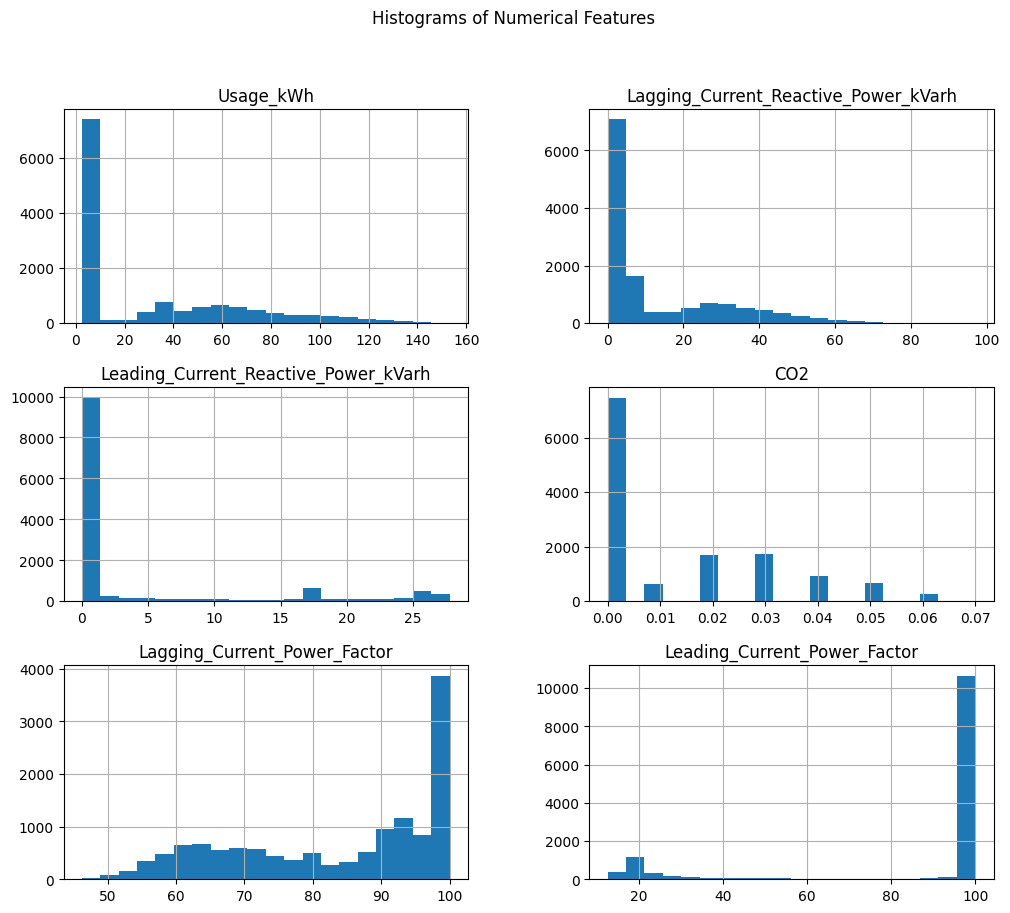

In [11]:
numerical_cols = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
                  'Leading_Current_Reactive_Power_kVarh', 'CO2',
                  'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

# Histograms
df[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

line plot to target var and bin
flat-do not consider

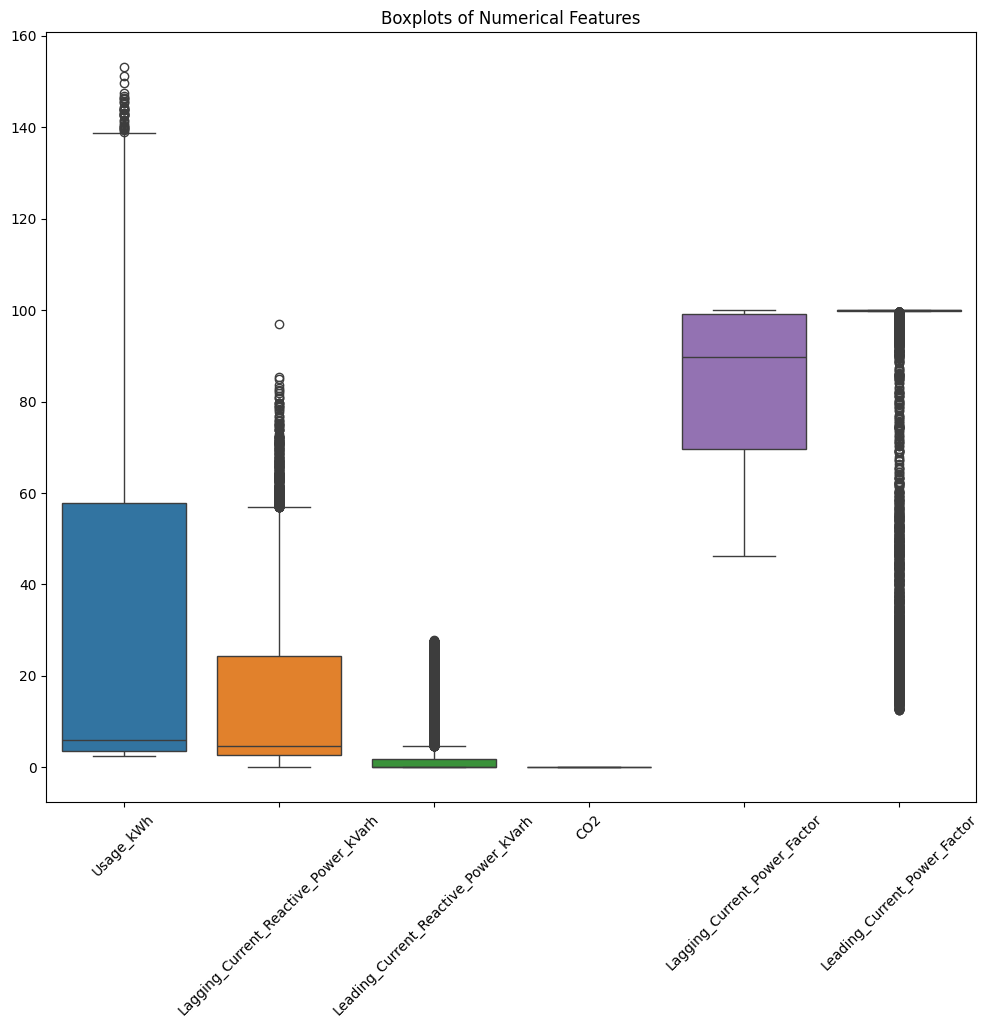

In [12]:
# Boxplot for outliers detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


Load_Type
Light_Load      6884
Medium_Load     3726
Maximum_Load    2808
Name: count, dtype: int64


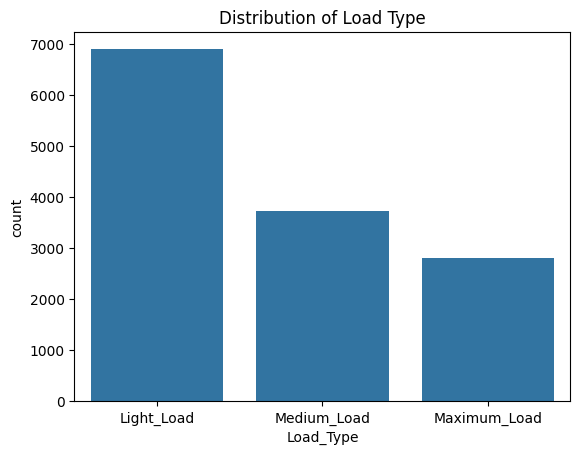

In [13]:
# Frequency count of categorical variable Load_Type
print(df['Load_Type'].value_counts())

# Visualizing Load_Type distribution
sns.countplot(x='Load_Type', data=df)
plt.title('Distribution of Load Type')
plt.show()


<ipython-input-14-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


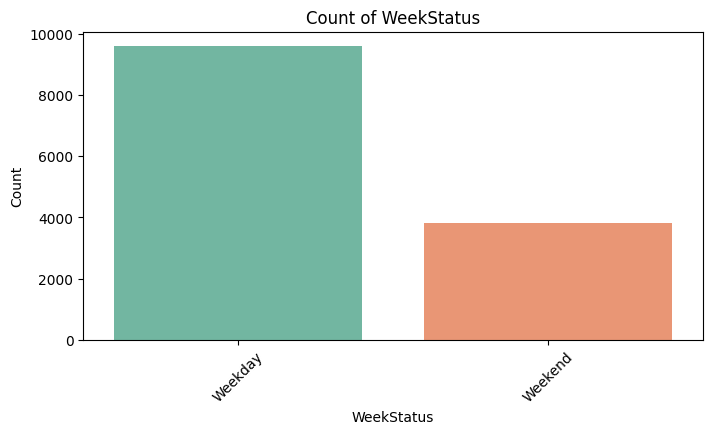

<ipython-input-14-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


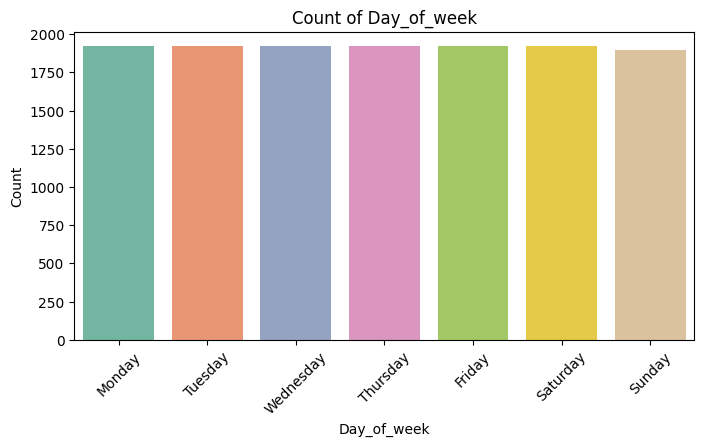

<ipython-input-14-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


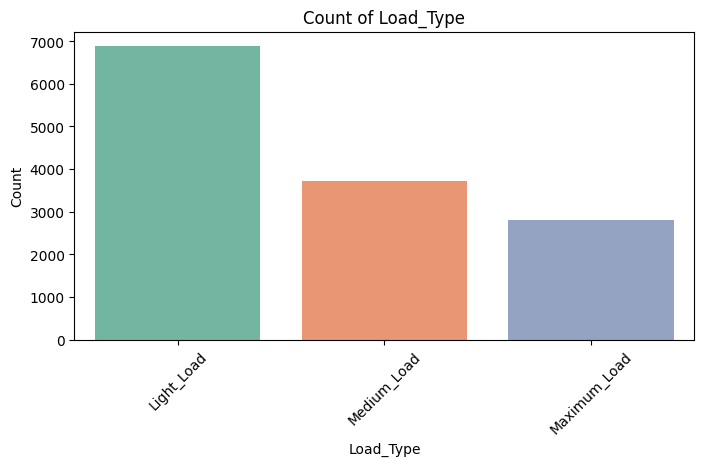

In [14]:
categorical_columns = ['WeekStatus', 'Day_of_week', 'Load_Type']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## **Bivariate Analysis**

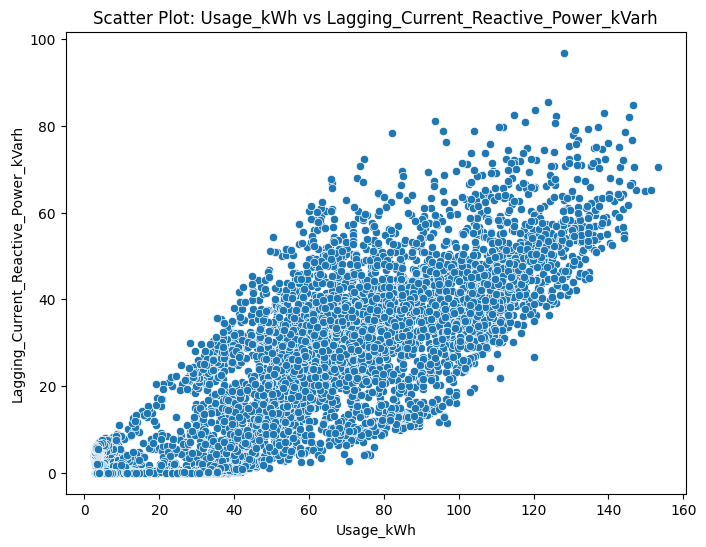

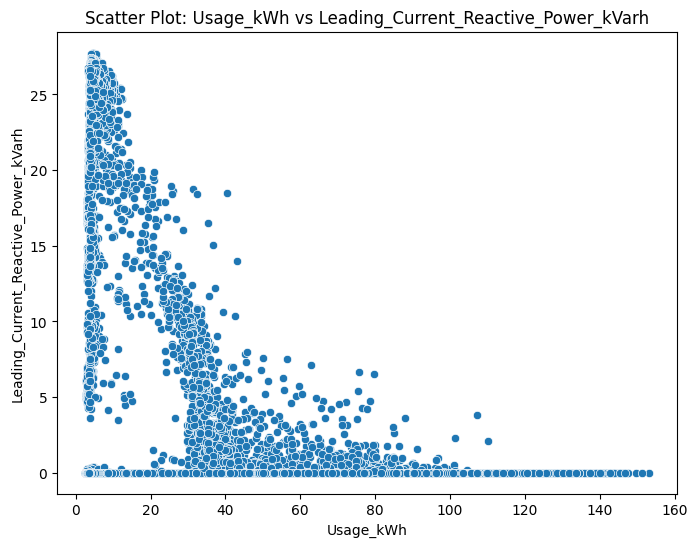

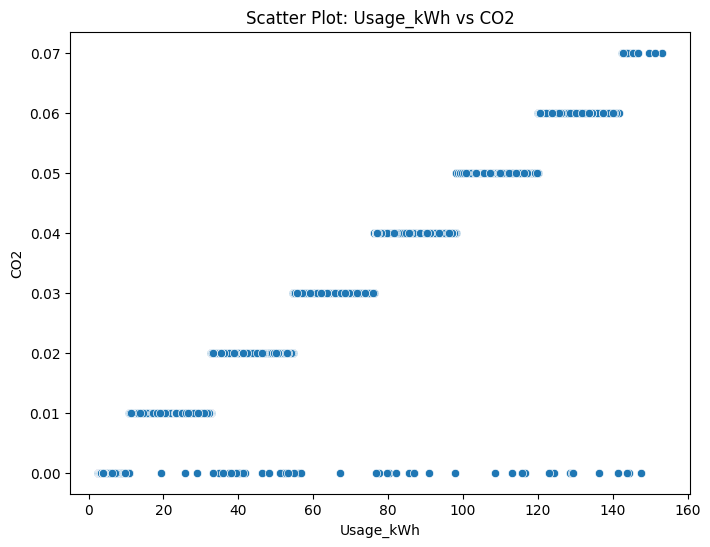

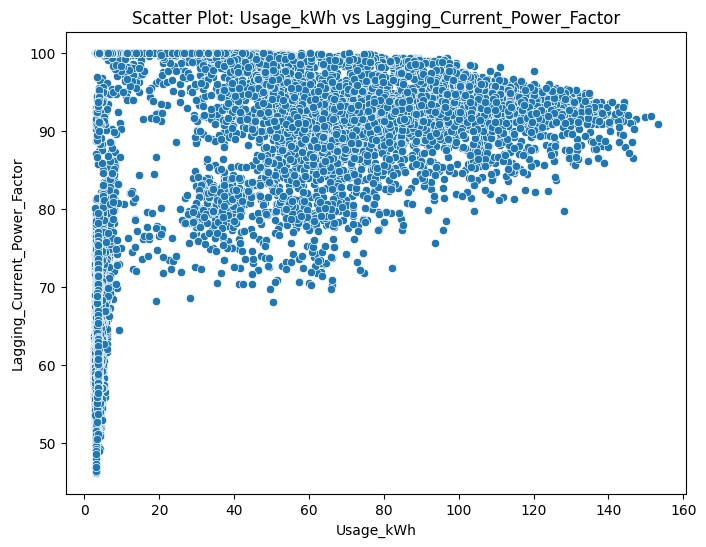

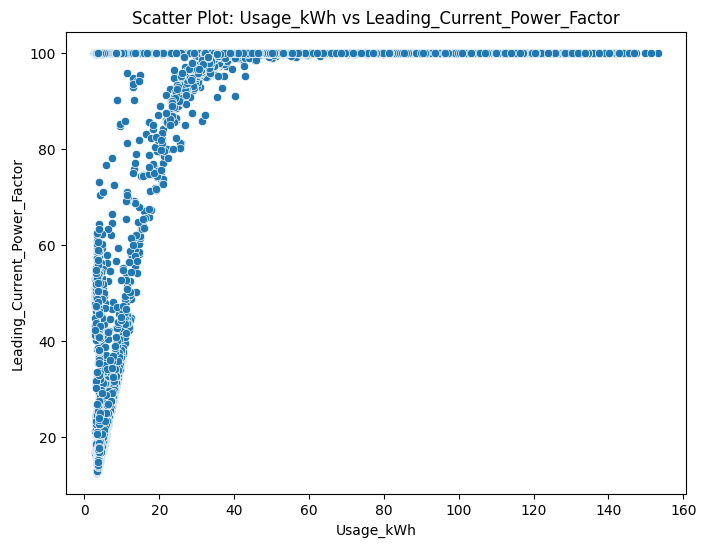

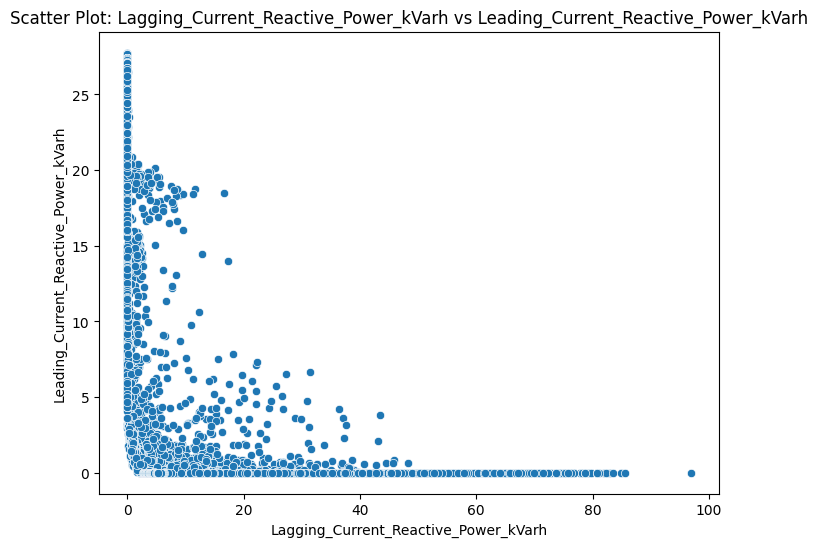

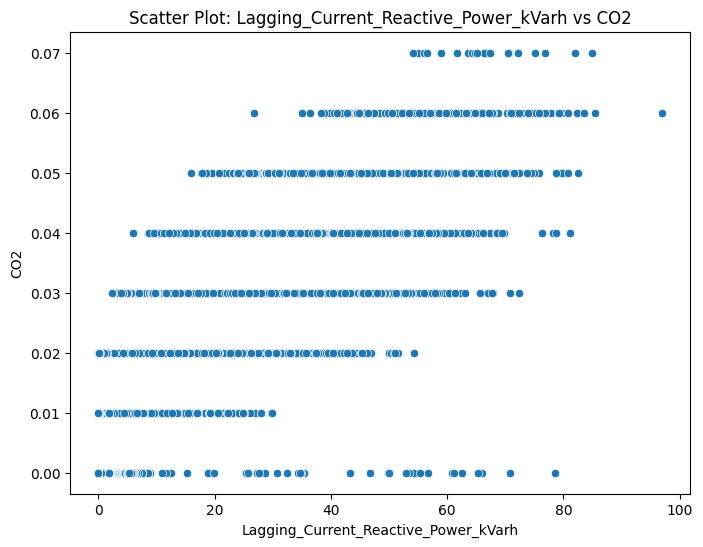

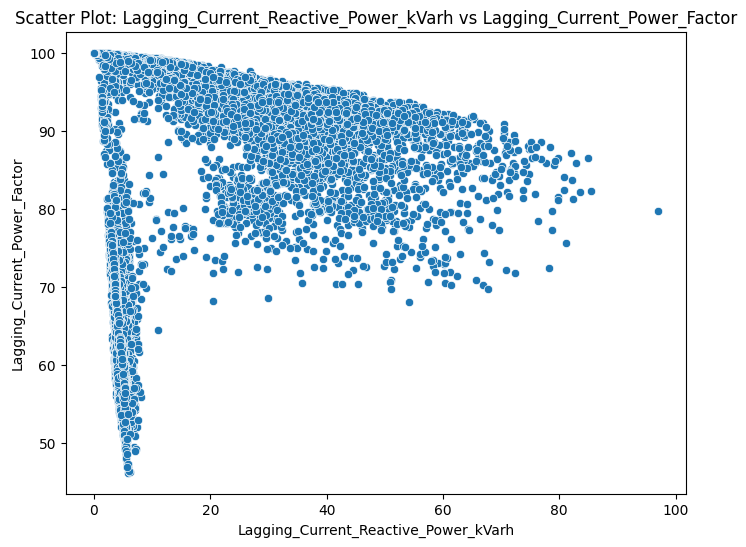

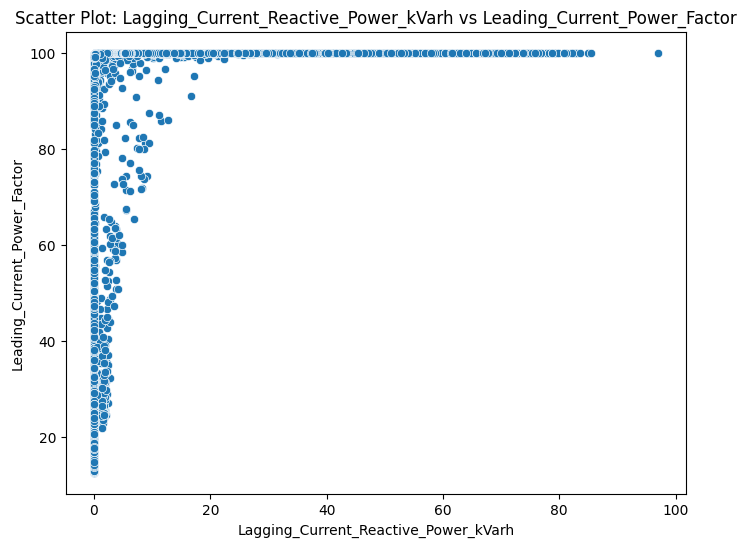

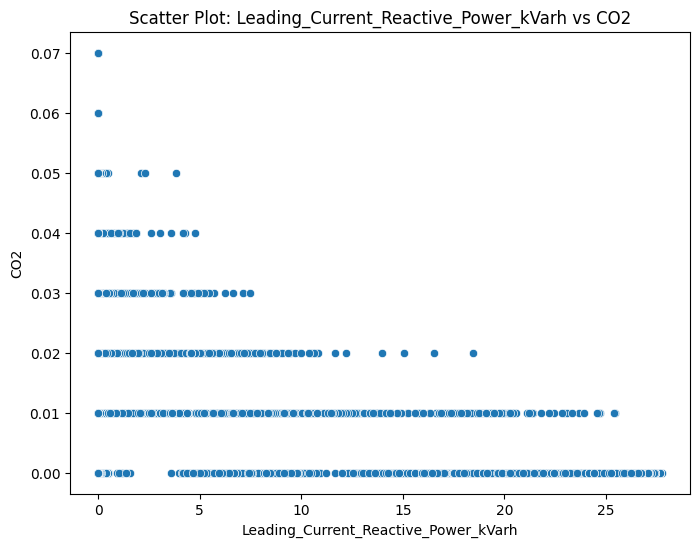

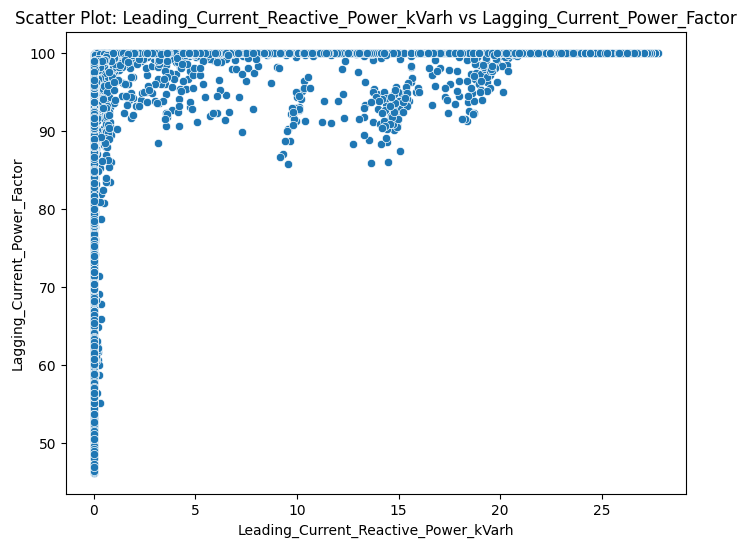

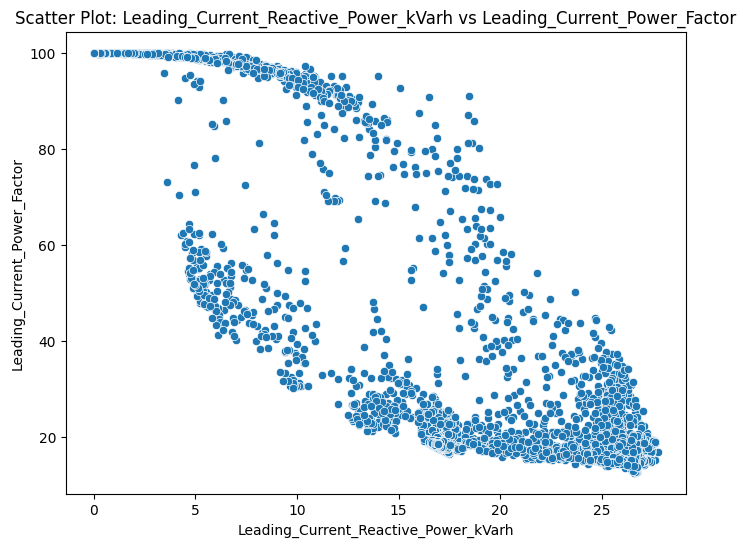

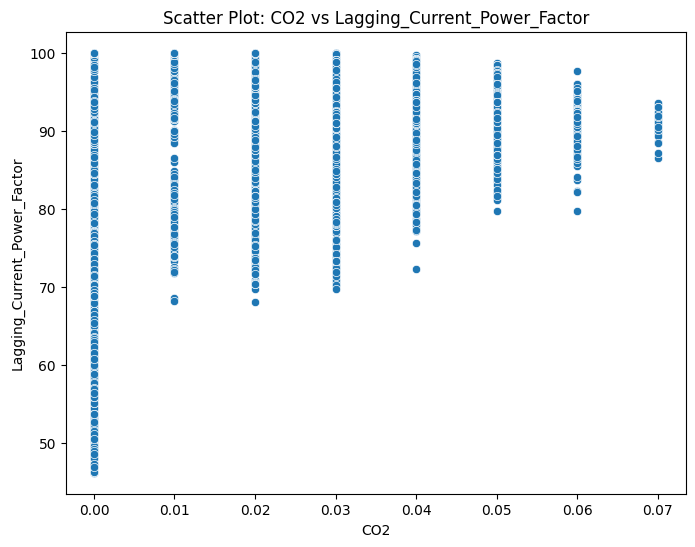

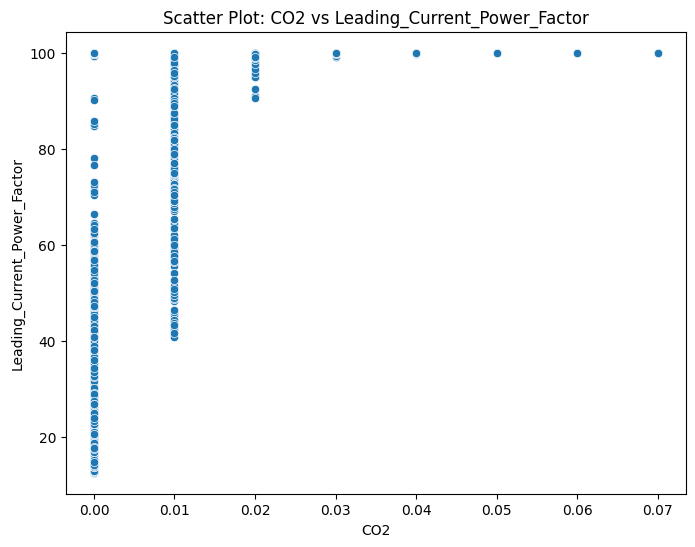

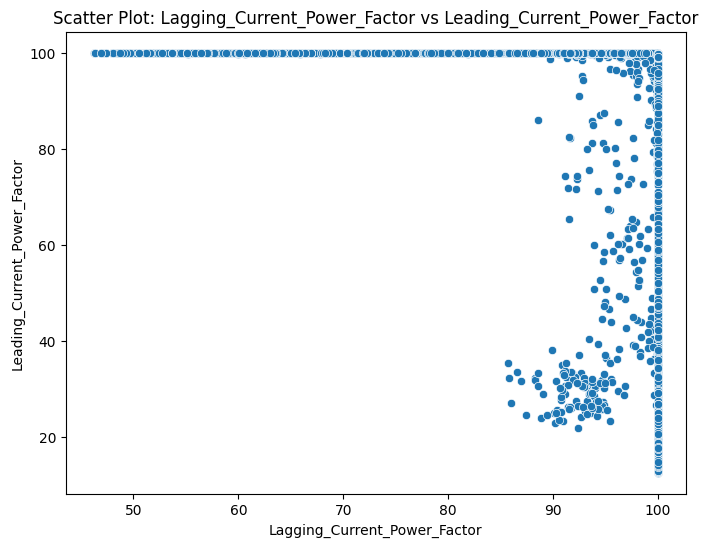

In [15]:
# Bivariate Analysis: Numerical vs. Numerical
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        x = numerical_cols[i]
        y = numerical_cols[j]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=x, y=y)
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.show()

### **Multivariate Analysis**

In [16]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)


                                      Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive_Power_kVarh   0.879987   
Leading_Current_Reactive_Power_kVarh  -0.336436   
CO2                                    0.983139   
Lagging_Current_Power_Factor           0.407588   
Leading_Current_Power_Factor           0.357291   

                                      Lagging_Current_Reactive_Power_kVarh  \
Usage_kWh                                                         0.879987   
Lagging_Current_Reactive_Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.400256   
CO2                                                               0.864088   
Lagging_Current_Power_Factor                                      0.138458   
Leading_Current_Power_Factor                                      0.387151   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh        

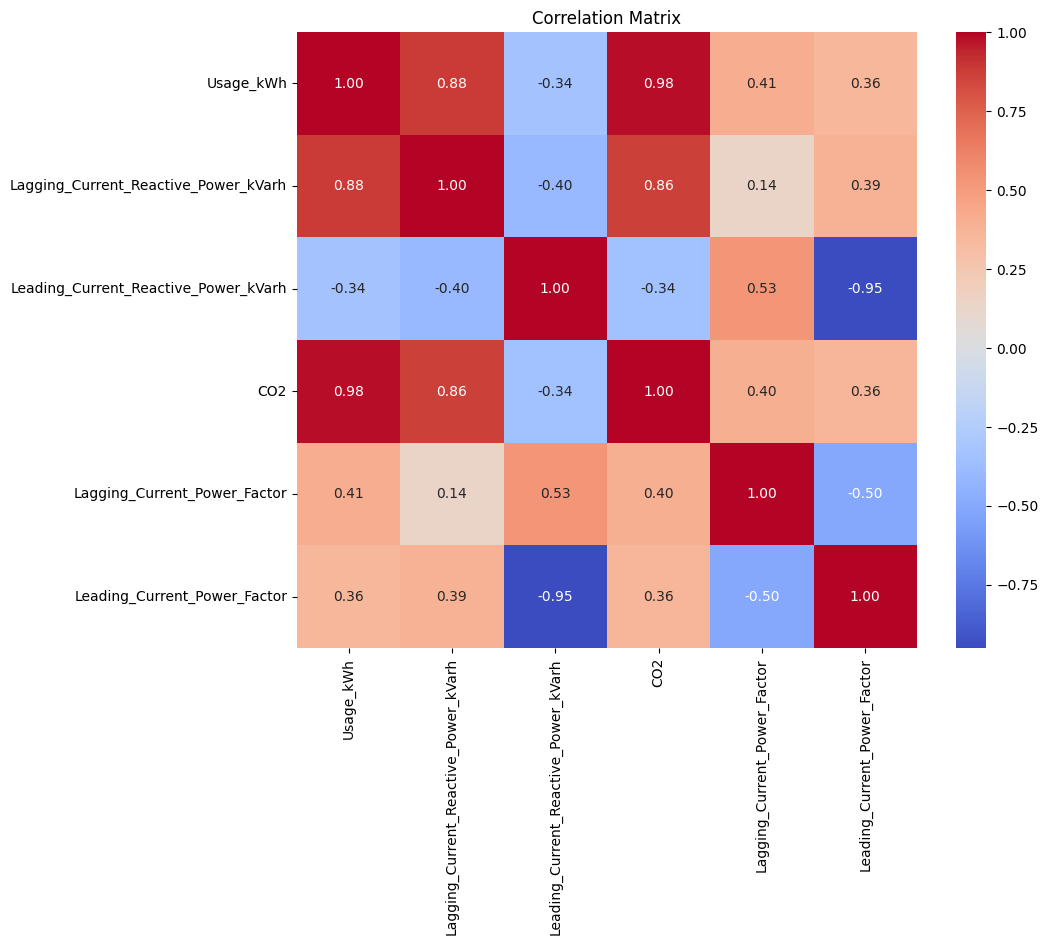

In [17]:
# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


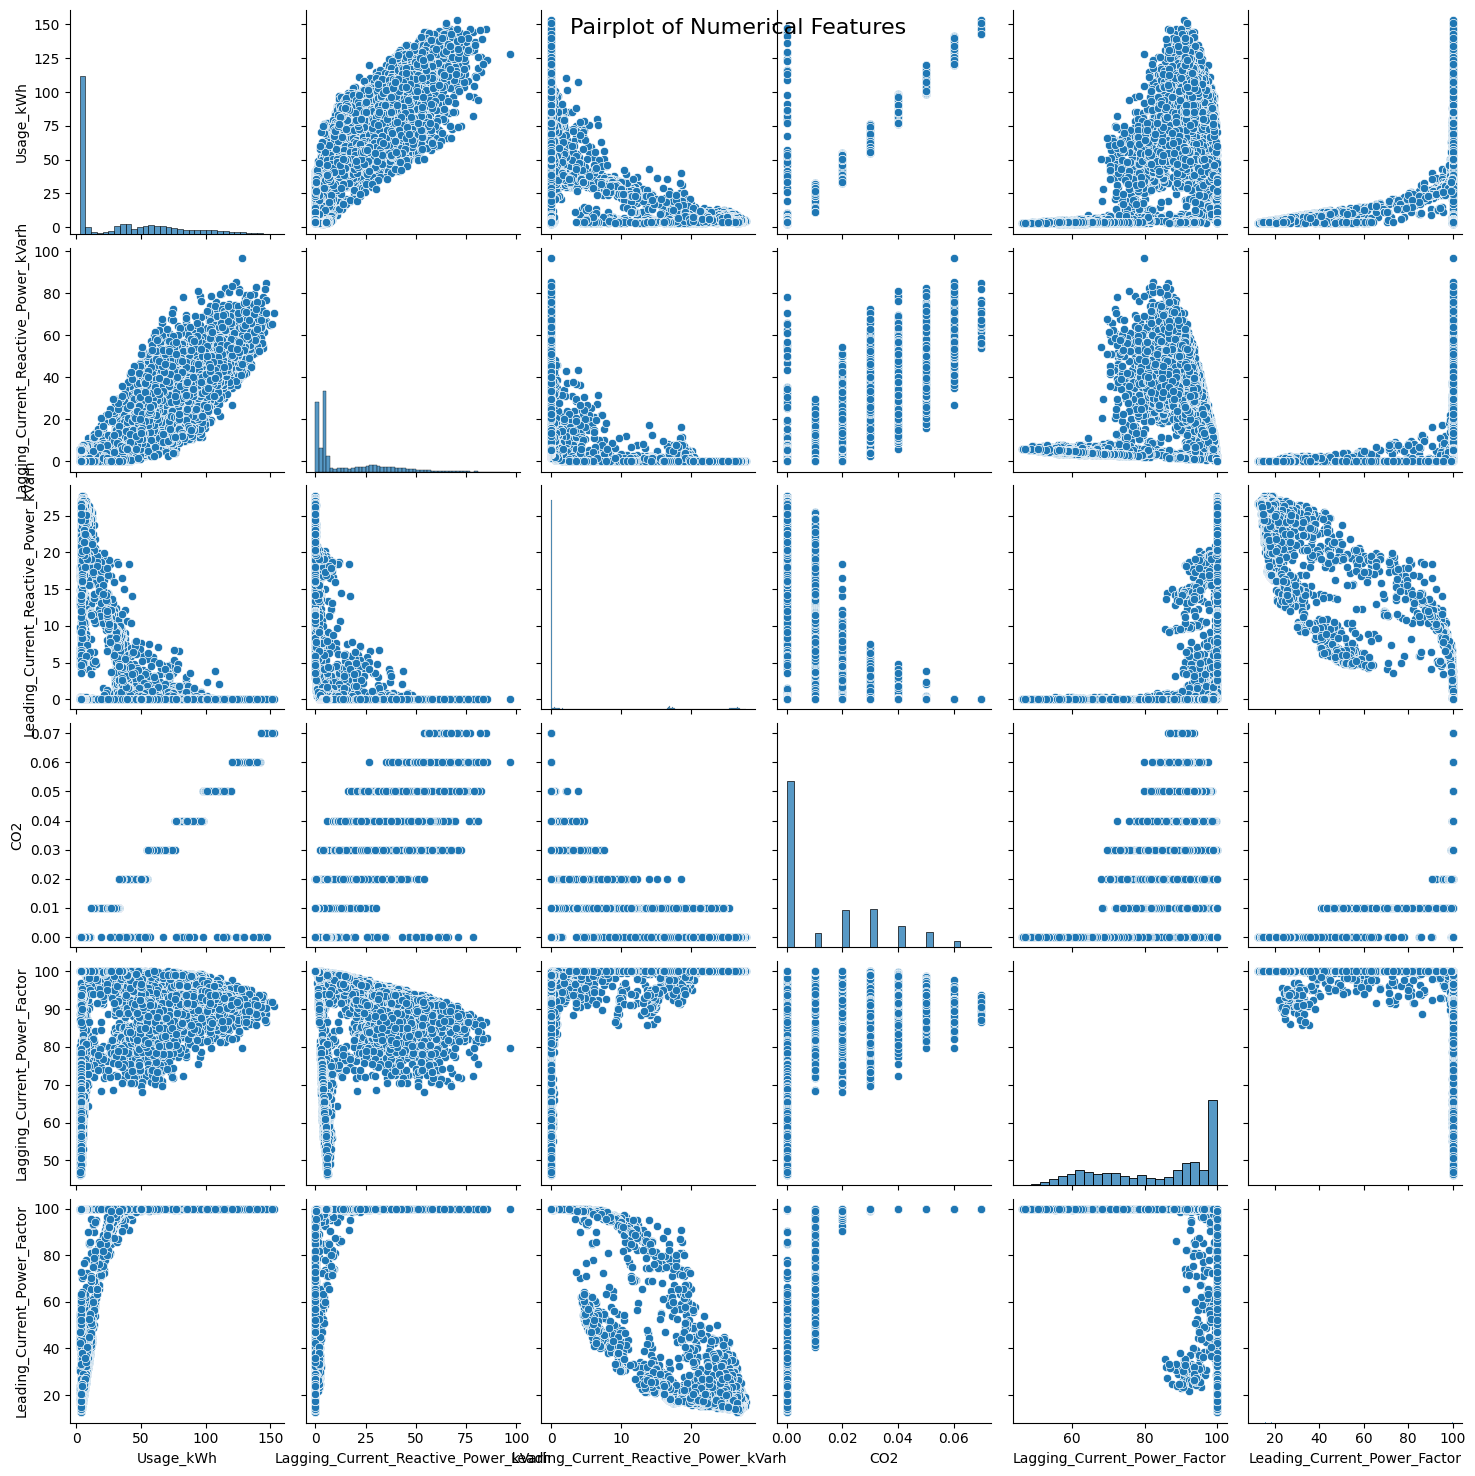

In [18]:
#Pair Plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', size=16)
plt.show()


## **Handling Outliers**

In [19]:
from scipy.stats import zscore

In [20]:
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers
outliers_zscore = {}
threshold = 3
for col in numerical_cols:
    outliers_zscore[col] = df[(z_scores[col] > threshold) | (z_scores[col] < -threshold)]

# Print outliers for each column
for col, outlier_data in outliers_zscore.items():
    print(f"Outliers in {col}:\n", outlier_data)

Outliers in Usage_kWh:
                   date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
141   02-01-2018 11:30     144.47                                 78.48   
155   02-01-2018 15:00     143.89                                 60.91   
157   02-01-2018 15:30     141.44                                 62.57   
162   02-01-2018 16:45     147.46                                 65.27   
352   04-01-2018 16:15     144.29                                 54.94   
447   05-01-2018 16:00     146.34                                 66.92   
452   05-01-2018 17:15     145.69                                 66.35   
749   08-01-2018 19:30     143.78                                 64.30   
751   08-01-2018 20:00     145.30                                 61.74   
908   10-01-2018 11:15     143.21                                 70.56   
1093  12-01-2018 09:30     143.17                                 63.65   
1397  15-01-2018 13:30     146.27                                 76.79   
1

## **Binning**

In [21]:
# Define bins and labels for binning
bins = [0,15, 35, 85, 100]
labels = [1,5,2,10]

# Apply binning to the 'Leading_Current_Power_Factor' column
df['Power_Factor_Bin'] = pd.cut(df['Leading_Current_Power_Factor'], bins=bins, labels=labels, include_lowest=True)

print(df[['Leading_Current_Power_Factor', 'Power_Factor_Bin']].head(50))


    Leading_Current_Power_Factor Power_Factor_Bin
0                         100.00               10
1                         100.00               10
2                         100.00               10
3                         100.00               10
4                         100.00               10
5                         100.00               10
6                         100.00               10
7                         100.00               10
8                         100.00               10
9                         100.00               10
10                        100.00               10
11                        100.00               10
12                        100.00               10
13                        100.00               10
14                        100.00               10
15                        100.00               10
16                        100.00               10
17                        100.00               10
18                        100.00               10


In [22]:
df['Power_Factor_Bin'].isna().sum()

0

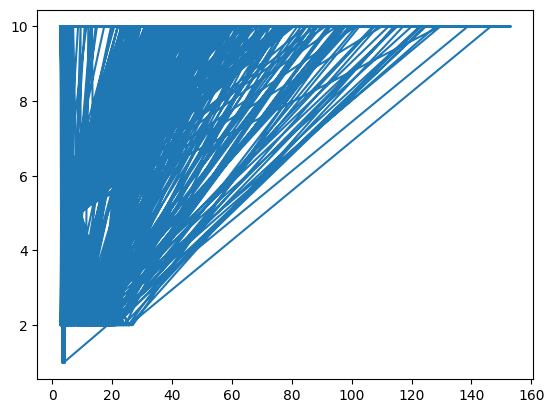

In [23]:
x=df['Usage_kWh']
plt.plot(x,df['Power_Factor_Bin'])

## **Encoding**

In [24]:
# Drop the 'Day_of_week' column from the dataset
df = df.drop(columns=['Day_of_week'])

print(df.head())


               date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
0  01-01-2018 00:15       3.17                                  2.95   
1  01-01-2018 00:30       4.00                                  4.46   
2  01-01-2018 00:45       3.24                                  3.28   
3  01-01-2018 01:00       3.31                                  3.56   
4  01-01-2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2  Lagging_Current_Power_Factor  \
0                                   0.0  0.0                         73.21   
1                                   0.0  0.0                         66.77   
2                                   0.0  0.0                         70.28   
3                                   0.0  0.0                         68.09   
4                                   0.0  0.0                         64.72   

   Leading_Current_Power_Factor     NSM WeekStatus   Load_Type  \
0                         100.0 

In [25]:

from sklearn.preprocessing import LabelEncoder

# One-hot encoding for 'WeekStatus' column
df = pd.get_dummies(df, columns=['WeekStatus'], prefix='WeekStatus')

# Label encoding for 'Load_Type' column
label_encoder = LabelEncoder()
df['Load_Type_Encoded'] = label_encoder.fit_transform(df['Load_Type'])

In [26]:
df

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Power_Factor_Bin,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Encoded
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900.0,Light_Load,10,True,False,0
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800.0,Light_Load,10,True,False,0
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700.0,Light_Load,10,True,False,0
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600.0,Light_Load,10,True,False,0
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500.0,Light_Load,10,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13413,20-05-2018 17:30,4.03,0.00,15.95,0.0,100.00,24.50,63000.0,Medium_Load,5,False,True,2
13414,20-05-2018 17:45,4.10,0.00,15.95,0.0,100.00,24.90,63900.0,Medium_Load,5,False,True,2
13415,20-05-2018 18:00,3.96,0.00,16.06,0.0,100.00,23.94,64800.0,Medium_Load,5,False,True,2
13416,20-05-2018 18:15,3.82,0.00,4.68,0.0,100.00,63.23,65700.0,Medium_Load,2,False,True,2



## **Model Training**


In [27]:
#Indexing date
df = df.set_index('date')

#Handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Encoded,Load_Type_Maximum_Load,Load_Type_Medium_Load,Power_Factor_Bin_5,Power_Factor_Bin_2,Power_Factor_Bin_10
date,,,,,,,,,,,,,,,
01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900.0,True,False,0,False,False,False,False,True
01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,True,False,0,False,False,False,False,True
01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,True,False,0,False,False,False,False,True
01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,True,False,0,False,False,False,False,True
01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500.0,True,False,0,False,False,False,False,True


In [28]:
#Splitting data set
from sklearn.model_selection import train_test_split
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [29]:
X_train

,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Encoded,Load_Type_Maximum_Load,Load_Type_Medium_Load,Power_Factor_Bin_5,Power_Factor_Bin_2,Power_Factor_Bin_10
date,,,,,,,,,,,,,,
11-03-2018 00:15,2.63,0.00,0.00,75.84,100.0,900.0,False,True,0,False,False,False,False,True
29-01-2018 04:45,3.92,0.00,0.00,72.61,100.0,17100.0,True,False,0,False,False,False,False,True
07-05-2018 14:00,36.83,0.00,0.05,93.70,100.0,50400.0,True,False,1,True,False,False,False,True
11-01-2018 19:00,36.94,0.00,0.05,94.55,100.0,68400.0,True,False,1,True,False,False,False,True
29-01-2018 19:15,39.17,0.00,0.04,91.66,100.0,69300.0,True,False,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-01-2018 10:30,32.65,0.00,0.05,95.55,100.0,37800.0,True,False,1,True,False,False,False,True
24-02-2018 02:15,4.72,0.00,0.00,78.49,100.0,8100.0,False,True,0,False,False,False,False,True
07-05-2018 19:15,31.10,0.00,0.05,95.96,100.0,69300.0,True,False,2,False,True,False,False,True


In [30]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the results
print(f"R² Score for Linear Regression: {r2:.4f}")
print(f"Adjusted R² Score for Linear Regression: {adjusted_r2:.4f}")


R² Score for Linear Regression: 0.9794
Adjusted R² Score for Linear Regression: 0.9793


In [31]:
import xgboost as xgb
from sklearn.metrics import r2_score

#XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Display the results
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")


R²: 0.9956
Adjusted R²: 0.9956


In [33]:
import pickle

# Save the trained Linear Regression model
with open('linear_model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)


In [35]:
with open('linear_model.pkl', 'rb') as model_file:
    linear_model = pickle.load(model_file)
